In [183]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [184]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [185]:
NUM_CLASSES = 5

# Dataset reading

In [186]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [187]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [189]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [190]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_20 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [191]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [192]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [193]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 5s 492ms/step - accuracy: 0.2031 - loss: 1.7223
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1822 - loss: 1.7178 - val_accuracy: 0.2083 - val_loss: 1.6169
Epoch 2/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1953 - loss: 1.6259
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2244 - loss: 1.6245 - val_accuracy: 0.3732 - val_loss: 1.5403
Epoch 3/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2812 - loss: 1.6158
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2696 - loss: 1.5974 - val_accuracy: 0.4946 - val_loss: 1.5005
Epoch 4/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2500 - loss: 1.5775
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3167 - loss: 1.5439 - val_accuracy: 0.5362 - val_loss: 1.4739
Epoch 5/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3906 - loss: 1.5302
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3707 - loss: 1.5150 - val_accuracy: 0.5236 - val_loss: 1.4463
Epoch 6/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3594 - loss: 1.5345
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3706 - loss: 1.5004 - val_accuracy: 0.5145 - val_loss: 1.4193
Epoch 7/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4531 - loss: 1.4476
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3949 - loss: 1.4668 - val_accuracy: 0.5109 - val_loss: 1.3901
Epoch 8/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3438 - loss: 1.4705
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3971 - loss: 1.4531 - val_accuracy: 0.5308 - val_loss: 1.3570
Epoch 9/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5000 - loss: 1.3965
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4412 - loss: 1.3987 - val_accuracy: 0.5362 - val_loss: 1.3170
Epoch 10/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4062 - loss: 1.4397
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4250 - loss: 1.4022 - val_accuracy: 0.5308 - val_loss: 1.2817
Epoch 11/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3828 - loss: 1.4351
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4373 - loss: 1.3634 - val_accuracy: 0.5362 - val_loss: 1.2467
Epoch 12/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4844 - loss: 1.3238
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4743 - loss: 1.3166 - val_accuracy: 0.5598 - val_loss: 1.2021
Epoch 13/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4375 - loss: 1.3384
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4895 - loss: 1.2858 - val_accuracy: 0.6051 - val_loss: 1.1551
Epoch 14/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5391 - loss: 1.1810
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5257 - loss: 1.2382 - val_accuracy: 0.6087 - val_loss: 1.1111
Epoch 15/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5000 - loss: 1.2225
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5103 - loss: 1.2225 - val_accuracy: 0.6486 - val_loss: 1.0626
Epoch 16/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5078 - loss: 1.2079
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5252 - loss: 1.1874 - val_accuracy: 0.6830 - val_loss: 1.0145
Epoch 17/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5469 - loss: 1.2704
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5416 - loss: 1.1952 - val_accuracy: 0.7101 - val_loss: 0.9683
Epoch 18/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5156 - loss: 1.1452
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5405 - loss: 1.1488 - val_accuracy: 0.7029 - val_loss: 0.9360
Epoch 19/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5000 - loss: 1.1671
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5614 - loss: 1.1165 - val_accuracy: 0.7283 - val_loss: 0.8975
Epoch 20/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5859 - loss: 1.1099
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5892 - loss: 1.0844 - val_accuracy: 0.7264 - val_loss: 0.8625
Epoch 21/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5312 - loss: 1.1317
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5911 - loss: 1.0820 - val_accuracy: 0.7301 - val_loss: 0.8312
Epoch 22/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6172 - loss: 1.0093
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6047 - loss: 1.0356 - val_accuracy: 0.7301 - val_loss: 0.8003
Epoch 23/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5547 - loss: 1.1147
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5792 - loss: 1.0563 - val_accuracy: 0.7373 - val_loss: 0.7772
Epoch 24/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5703 - loss: 1.1432
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6105 - loss: 1.0439 - val_accuracy: 0.7319 - val_loss: 0.7580
Epoch 25/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6094 - loss: 1.0177
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6110 - loss: 1.0141 - val_accuracy: 0.7518 - val_loss: 0.7355
Epoch 26/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6172 - loss: 1.0060
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6273 - loss: 0.9860 - val_accuracy: 0.7971 - val_loss: 0.7089
Epoch 27/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6484 - loss: 0.9758
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6169 - loss: 0.9886 - val_accuracy: 0.8007 - val_loss: 0.6935
Epoch 28/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6250 - loss: 0.9579
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6294 - loss: 0.9672 - val_accuracy: 0.7917 - val_loss: 0.6756
Epoch 29/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5859 - loss: 0.9842
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6378 - loss: 0.9414 - val_accuracy: 0.8188 - val_loss: 0.6533
Epoch 30/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6953 - loss: 0.8257
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6662 - loss: 0.8891 - val_accuracy: 0.8297 - val_loss: 0.6289
Epoch 31/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6562 - loss: 0.9034
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6616 - loss: 0.8950 - val_accuracy: 0.8442 - val_loss: 0.6075
Epoch 32/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6406 - loss: 0.9513
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6733 - loss: 0.8802 - val_accuracy: 0.8478 - val_loss: 0.5932
Epoch 33/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6953 - loss: 0.8097
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6853 - loss: 0.8603 - val_accuracy: 0.8569 - val_loss: 0.5774
Epoch 34/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6406 - loss: 0.8744
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6763 - loss: 0.8666 - val_accuracy: 0.8605 - val_loss: 0.5611
Epoch 35/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6953 - loss: 0.8650
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6887 - loss: 0.8624 - val_accuracy: 0.8605 - val_loss: 0.5484
Epoch 36/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6641 - loss: 0.7979
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6782 - loss: 0.8265 - val_accuracy: 0.8877 - val_loss: 0.5318
Epoch 37/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6953 - loss: 0.9224
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7014 - loss: 0.8460 - val_accuracy: 0.8986 - val_loss: 0.5144
Epoch 38/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7500 - loss: 0.8066
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7118 - loss: 0.8171 - val_accuracy: 0.9040 - val_loss: 0.5020
Epoch 39/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7188 - loss: 0.7734
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7246 - loss: 0.7701 - val_accuracy: 0.8822 - val_loss: 0.4878
Epoch 40/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7656 - loss: 0.6907
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7247 - loss: 0.7705 - val_accuracy: 0.8931 - val_loss: 0.4718
Epoch 41/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6484 - loss: 0.9191
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6942 - loss: 0.8144 - val_accuracy: 0.9112 - val_loss: 0.4600
Epoch 42/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6953 - loss: 0.7544
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7073 - loss: 0.7835 - val_accuracy: 0.9004 - val_loss: 0.4527
Epoch 43/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7422 - loss: 0.7277
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7274 - loss: 0.7643 - val_accuracy: 0.8949 - val_loss: 0.4395
Epoch 44/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7266 - loss: 0.6748
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7180 - loss: 0.7380 - val_accuracy: 0.8949 - val_loss: 0.4294
Epoch 45/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6797 - loss: 0.7999
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7108 - loss: 0.7621 - val_accuracy: 0.9149 - val_loss: 0.4231
Epoch 46/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7109 - loss: 0.7016
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7142 - loss: 0.7543 - val_accuracy: 0.9203 - val_loss: 0.4179
Epoch 47/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6797 - loss: 0.8074
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7483 - loss: 0.7017 - val_accuracy: 0.9221 - val_loss: 0.4081
Epoch 48/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7344 - loss: 0.8333
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7257 - loss: 0.7572 - val_accuracy: 0.9203 - val_loss: 0.3983
Epoch 49/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7266 - loss: 0.7021
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7119 - loss: 0.7500 - val_accuracy: 0.9239 - val_loss: 0.3895
Epoch 50/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.6764
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7465 - loss: 0.7077 - val_accuracy: 0.9221 - val_loss: 0.3802
Epoch 51/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7656 - loss: 0.6946
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7318 - loss: 0.7525 - val_accuracy: 0.9275 - val_loss: 0.3743
Epoch 52/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.6325
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7678 - loss: 0.6703 - val_accuracy: 0.9239 - val_loss: 0.3659
Epoch 53/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.5803
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7495 - loss: 0.6736 - val_accuracy: 0.9221 - val_loss: 0.3544
Epoch 54/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7500 - loss: 0.7354
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7490 - loss: 0.6959 - val_accuracy: 0.9275 - val_loss: 0.3469
Epoch 55/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7031 - loss: 0.8082
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7344 - loss: 0.6938 - val_accuracy: 0.9293 - val_loss: 0.3417
Epoch 56/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7344 - loss: 0.6889
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7265 - loss: 0.6983 - val_accuracy: 0.9275 - val_loss: 0.3350
Epoch 57/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7578 - loss: 0.6507
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7645 - loss: 0.6561 - val_accuracy: 0.9257 - val_loss: 0.3306
Epoch 58/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8125 - loss: 0.6117
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7514 - loss: 0.6655 - val_accuracy: 0.9330 - val_loss: 0.3250
Epoch 59/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7656 - loss: 0.6483
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7622 - loss: 0.6504 - val_accuracy: 0.9312 - val_loss: 0.3236
Epoch 60/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7422 - loss: 0.6257
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7633 - loss: 0.6359 - val_accuracy: 0.9348 - val_loss: 0.3150
Epoch 61/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7266 - loss: 0.7229
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7245 - loss: 0.7168 - val_accuracy: 0.9312 - val_loss: 0.3108
Epoch 62/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7812 - loss: 0.6107
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7567 - loss: 0.6530 - val_accuracy: 0.9293 - val_loss: 0.3098
Epoch 63/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7422 - loss: 0.6203
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7550 - loss: 0.6604 - val_accuracy: 0.9312 - val_loss: 0.3082
Epoch 64/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7422 - loss: 0.7474
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7635 - loss: 0.6513 - val_accuracy: 0.9366 - val_loss: 0.3045
Epoch 65/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.6165
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7827 - loss: 0.6218 - val_accuracy: 0.9366 - val_loss: 0.2931
Epoch 66/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7656 - loss: 0.6819
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7561 - loss: 0.6445 - val_accuracy: 0.9366 - val_loss: 0.2844
Epoch 67/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.5454
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7587 - loss: 0.6155 - val_accuracy: 0.9384 - val_loss: 0.2799
Epoch 68/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7500 - loss: 0.6639
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7739 - loss: 0.6195 - val_accuracy: 0.9402 - val_loss: 0.2740
Epoch 69/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7891 - loss: 0.6698
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7821 - loss: 0.6107 - val_accuracy: 0.9420 - val_loss: 0.2702
Epoch 70/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7500 - loss: 0.7055
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7481 - loss: 0.6633 - val_accuracy: 0.9402 - val_loss: 0.2707
Epoch 71/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.6116
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7676 - loss: 0.6499 - val_accuracy: 0.9457 - val_loss: 0.2680
Epoch 72/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.5616
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7456 - loss: 0.6543 - val_accuracy: 0.9402 - val_loss: 0.2654
Epoch 73/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.5321
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7784 - loss: 0.5778 - val_accuracy: 0.9402 - val_loss: 0.2635
Epoch 74/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.6024
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7686 - loss: 0.6186 - val_accuracy: 0.9402 - val_loss: 0.2624
Epoch 75/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6875 - loss: 0.7554
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7670 - loss: 0.6369 - val_accuracy: 0.9420 - val_loss: 0.2595
Epoch 76/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.5876
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7797 - loss: 0.6179 - val_accuracy: 0.9420 - val_loss: 0.2551
Epoch 77/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.4710
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7909 - loss: 0.5648 - val_accuracy: 0.9438 - val_loss: 0.2527
Epoch 78/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.5870
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7887 - loss: 0.5881 - val_accuracy: 0.9457 - val_loss: 0.2518
Epoch 79/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7422 - loss: 0.6600
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7733 - loss: 0.6196 - val_accuracy: 0.9493 - val_loss: 0.2474
Epoch 80/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7344 - loss: 0.6355
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7768 - loss: 0.5993 - val_accuracy: 0.9457 - val_loss: 0.2447
Epoch 81/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7734 - loss: 0.5586
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7940 - loss: 0.5734 - val_accuracy: 0.9493 - val_loss: 0.2379
Epoch 82/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.5427
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7886 - loss: 0.5667 - val_accuracy: 0.9493 - val_loss: 0.2319
Epoch 83/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7500 - loss: 0.6683
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7821 - loss: 0.6055 - val_accuracy: 0.9493 - val_loss: 0.2325
Epoch 84/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.5677
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7867 - loss: 0.5628 - val_accuracy: 0.9475 - val_loss: 0.2318
Epoch 85/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.5907
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7865 - loss: 0.5941 - val_accuracy: 0.9475 - val_loss: 0.2307
Epoch 86/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.4434
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7999 - loss: 0.5494 - val_accuracy: 0.9475 - val_loss: 0.2283
Epoch 87/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7031 - loss: 0.6911
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7808 - loss: 0.5698 - val_accuracy: 0.9493 - val_loss: 0.2263
Epoch 88/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7812 - loss: 0.5930
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 0.5602 - val_accuracy: 0.9475 - val_loss: 0.2273
Epoch 89/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7578 - loss: 0.6057
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7771 - loss: 0.5700 - val_accuracy: 0.9511 - val_loss: 0.2208
Epoch 90/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.6010
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7795 - loss: 0.6043 - val_accuracy: 0.9529 - val_loss: 0.2225
Epoch 91/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.5230
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8023 - loss: 0.5556 - val_accuracy: 0.9511 - val_loss: 0.2186
Epoch 92/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7578 - loss: 0.7037
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7780 - loss: 0.6095 - val_accuracy: 0.9493 - val_loss: 0.2180
Epoch 93/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7734 - loss: 0.6076
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7846 - loss: 0.5554 - val_accuracy: 0.9511 - val_loss: 0.2149
Epoch 94/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.5426
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7958 - loss: 0.5674 - val_accuracy: 0.9493 - val_loss: 0.2125
Epoch 95/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.5352
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7855 - loss: 0.5578 - val_accuracy: 0.9529 - val_loss: 0.2119
Epoch 96/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8438 - loss: 0.4312
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8042 - loss: 0.5241 - val_accuracy: 0.9547 - val_loss: 0.2096
Epoch 97/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7266 - loss: 0.6933
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7832 - loss: 0.5774 - val_accuracy: 0.9547 - val_loss: 0.2085
Epoch 98/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.5348
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7947 - loss: 0.5529 - val_accuracy: 0.9601 - val_loss: 0.2051
Epoch 99/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7656 - loss: 0.5091
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7874 - loss: 0.5421 - val_accuracy: 0.9565 - val_loss: 0.2054
Epoch 100/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.4975
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7799 - loss: 0.5792 - val_accuracy: 0.9565 - val_loss: 0.2089
Epoch 101/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7422 - loss: 0.6099
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7670 - loss: 0.5852 - val_accuracy: 0.9529 - val_loss: 0.2100
Epoch 102/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7812 - loss: 0.5958
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7988 - loss: 0.5551 - val_accuracy: 0.9565 - val_loss: 0.2048
Epoch 103/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7422 - loss: 0.6077
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7895 - loss: 0.5417 - val_accuracy: 0.9565 - val_loss: 0.2046
Epoch 104/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7891 - loss: 0.5567
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7862 - loss: 0.5670 - val_accuracy: 0.9565 - val_loss: 0.2029
Epoch 105/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.4547
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8169 - loss: 0.5078 - val_accuracy: 0.9583 - val_loss: 0.1967
Epoch 106/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.5271
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7956 - loss: 0.5634 - val_accuracy: 0.9601 - val_loss: 0.1987
Epoch 107/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8438 - loss: 0.4940
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8106 - loss: 0.5278 - val_accuracy: 0.9583 - val_loss: 0.2027
Epoch 108/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.4811
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8320 - loss: 0.4944 - val_accuracy: 0.9620 - val_loss: 0.1943
Epoch 109/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.5487
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7994 - loss: 0.5303 - val_accuracy: 0.9583 - val_loss: 0.1894
Epoch 110/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7656 - loss: 0.5958
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7922 - loss: 0.5560 - val_accuracy: 0.9601 - val_loss: 0.1929
Epoch 111/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.5719
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8048 - loss: 0.5304 - val_accuracy: 0.9620 - val_loss: 0.1840
Epoch 112/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7734 - loss: 0.5602
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7835 - loss: 0.5639 - val_accuracy: 0.9620 - val_loss: 0.1857
Epoch 113/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8359 - loss: 0.5169
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8051 - loss: 0.5285 - val_accuracy: 0.9620 - val_loss: 0.1871
Epoch 114/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6328 - loss: 0.7681
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7650 - loss: 0.6053 - val_accuracy: 0.9620 - val_loss: 0.1917
Epoch 115/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.6308
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8095 - loss: 0.5650 - val_accuracy: 0.9601 - val_loss: 0.1889
Epoch 116/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8125 - loss: 0.4852
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8133 - loss: 0.5067 - val_accuracy: 0.9601 - val_loss: 0.1892
Epoch 117/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7578 - loss: 0.6949
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7967 - loss: 0.5709 - val_accuracy: 0.9601 - val_loss: 0.1855
Epoch 118/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.6460
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8040 - loss: 0.5226 - val_accuracy: 0.9638 - val_loss: 0.1804
Epoch 119/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.5940
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8181 - loss: 0.5307 - val_accuracy: 0.9620 - val_loss: 0.1789
Epoch 120/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.4966
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8027 - loss: 0.5266 - val_accuracy: 0.9620 - val_loss: 0.1801
Epoch 121/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7656 - loss: 0.5637
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7953 - loss: 0.5202 - val_accuracy: 0.9601 - val_loss: 0.1798
Epoch 122/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8438 - loss: 0.4433
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8082 - loss: 0.4913 - val_accuracy: 0.9620 - val_loss: 0.1792
Epoch 123/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.4958
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7902 - loss: 0.5329 - val_accuracy: 0.9638 - val_loss: 0.1808
Epoch 124/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8438 - loss: 0.4778
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8130 - loss: 0.5288 - val_accuracy: 0.9620 - val_loss: 0.1831
Epoch 125/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.5435
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8073 - loss: 0.5302 - val_accuracy: 0.9620 - val_loss: 0.1831
Epoch 126/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7656 - loss: 0.5199
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8070 - loss: 0.5110 - val_accuracy: 0.9656 - val_loss: 0.1769
Epoch 127/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8125 - loss: 0.5154
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8009 - loss: 0.5332 - val_accuracy: 0.9728 - val_loss: 0.1715
Epoch 128/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7734 - loss: 0.5434
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7912 - loss: 0.5190 - val_accuracy: 0.9656 - val_loss: 0.1719
Epoch 129/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8438 - loss: 0.4209
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8243 - loss: 0.4651 - val_accuracy: 0.9674 - val_loss: 0.1734
Epoch 130/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7891 - loss: 0.6068
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8190 - loss: 0.4988 - val_accuracy: 0.9638 - val_loss: 0.1724
Epoch 131/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8594 - loss: 0.4050
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8134 - loss: 0.4957 - val_accuracy: 0.9656 - val_loss: 0.1717
Epoch 132/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.4364
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8167 - loss: 0.4717 - val_accuracy: 0.9656 - val_loss: 0.1750
Epoch 133/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.4775
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8111 - loss: 0.5110 - val_accuracy: 0.9710 - val_loss: 0.1694
Epoch 134/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8125 - loss: 0.5693
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8258 - loss: 0.5031 - val_accuracy: 0.9692 - val_loss: 0.1671
Epoch 135/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8203 - loss: 0.4541
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8110 - loss: 0.4990 - val_accuracy: 0.9674 - val_loss: 0.1669
Epoch 136/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.4825
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8159 - loss: 0.4815 - val_accuracy: 0.9674 - val_loss: 0.1715
Epoch 137/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.4586
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8093 - loss: 0.5055 - val_accuracy: 0.9656 - val_loss: 0.1625
Epoch 138/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8672 - loss: 0.4038
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8407 - loss: 0.4370 - val_accuracy: 0.9692 - val_loss: 0.1617
Epoch 139/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.5710
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8104 - loss: 0.4990 - val_accuracy: 0.9710 - val_loss: 0.1590
Epoch 140/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7734 - loss: 0.5811
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8004 - loss: 0.5230 - val_accuracy: 0.9710 - val_loss: 0.1649
Epoch 141/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8672 - loss: 0.3681
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8408 - loss: 0.4446 - val_accuracy: 0.9728 - val_loss: 0.1621
Epoch 142/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7344 - loss: 0.5894
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7968 - loss: 0.5249 - val_accuracy: 0.9656 - val_loss: 0.1645
Epoch 143/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8594 - loss: 0.4057
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8225 - loss: 0.4893 - val_accuracy: 0.9638 - val_loss: 0.1697
Epoch 144/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8281 - loss: 0.5466
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8120 - loss: 0.5231 - val_accuracy: 0.9692 - val_loss: 0.1627
Epoch 145/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.4912
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8249 - loss: 0.4870 - val_accuracy: 0.9728 - val_loss: 0.1612
Epoch 146/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8359 - loss: 0.4700
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8243 - loss: 0.4648 - val_accuracy: 0.9710 - val_loss: 0.1585
Epoch 147/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8438 - loss: 0.4647
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8211 - loss: 0.4868 - val_accuracy: 0.9728 - val_loss: 0.1590
Epoch 148/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.5249
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8261 - loss: 0.5074 - val_accuracy: 0.9728 - val_loss: 0.1647
Epoch 149/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.4403
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8161 - loss: 0.4848 - val_accuracy: 0.9710 - val_loss: 0.1674
Epoch 150/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.4801
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8335 - loss: 0.4805 - val_accuracy: 0.9764 - val_loss: 0.1623
Epoch 151/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.4453
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8222 - loss: 0.4726 - val_accuracy: 0.9783 - val_loss: 0.1584
Epoch 152/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8125 - loss: 0.5283
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8221 - loss: 0.4950 - val_accuracy: 0.9728 - val_loss: 0.1583
Epoch 153/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7812 - loss: 0.4540
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7984 - loss: 0.5011 - val_accuracy: 0.9783 - val_loss: 0.1518
Epoch 154/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.4814
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8160 - loss: 0.4822 - val_accuracy: 0.9783 - val_loss: 0.1490
Epoch 155/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8594 - loss: 0.4918
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8271 - loss: 0.4725 - val_accuracy: 0.9783 - val_loss: 0.1475
Epoch 156/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7812 - loss: 0.4718
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7976 - loss: 0.5026 - val_accuracy: 0.9746 - val_loss: 0.1525
Epoch 157/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8828 - loss: 0.4462
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8308 - loss: 0.4964 - val_accuracy: 0.9746 - val_loss: 0.1580
Epoch 158/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.5114
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8292 - loss: 0.4673 - val_accuracy: 0.9746 - val_loss: 0.1558
Epoch 159/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7812 - loss: 0.4350
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8260 - loss: 0.4372 - val_accuracy: 0.9764 - val_loss: 0.1499
Epoch 160/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.4992
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8244 - loss: 0.4581 - val_accuracy: 0.9728 - val_loss: 0.1493
Epoch 161/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.4354
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8287 - loss: 0.4517 - val_accuracy: 0.9674 - val_loss: 0.1530
Epoch 162/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8594 - loss: 0.4007
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8339 - loss: 0.4593 - val_accuracy: 0.9728 - val_loss: 0.1522
Epoch 163/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.5674
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8113 - loss: 0.5008 - val_accuracy: 0.9728 - val_loss: 0.1567
Epoch 164/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9062 - loss: 0.2999
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8438 - loss: 0.4266 - val_accuracy: 0.9801 - val_loss: 0.1521
Epoch 165/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8672 - loss: 0.4253
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8336 - loss: 0.4621 - val_accuracy: 0.9819 - val_loss: 0.1436
Epoch 166/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.4656
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8194 - loss: 0.4897 - val_accuracy: 0.9783 - val_loss: 0.1444
Epoch 167/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.5246
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8189 - loss: 0.4759 - val_accuracy: 0.9746 - val_loss: 0.1460
Epoch 168/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8359 - loss: 0.4451
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8343 - loss: 0.4453 - val_accuracy: 0.9746 - val_loss: 0.1481
Epoch 169/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8594 - loss: 0.4126
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8364 - loss: 0.4361 - val_accuracy: 0.9692 - val_loss: 0.1483
Epoch 170/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.5134
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8165 - loss: 0.4799 - val_accuracy: 0.9674 - val_loss: 0.1504
Epoch 171/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8125 - loss: 0.4875
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8255 - loss: 0.4549 - val_accuracy: 0.9710 - val_loss: 0.1482
Epoch 172/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8516 - loss: 0.4393
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8333 - loss: 0.4521 - val_accuracy: 0.9710 - val_loss: 0.1474
Epoch 173/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.5098
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8411 - loss: 0.4612 - val_accuracy: 0.9728 - val_loss: 0.1498
Epoch 174/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7656 - loss: 0.4986
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8106 - loss: 0.4723 - val_accuracy: 0.9746 - val_loss: 0.1458
Epoch 175/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.4734
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8255 - loss: 0.4683 - val_accuracy: 0.9746 - val_loss: 0.1465
Epoch 176/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.5254
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8254 - loss: 0.4732 - val_accuracy: 0.9764 - val_loss: 0.1466
Epoch 177/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7656 - loss: 0.5321
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8086 - loss: 0.4746 - val_accuracy: 0.9710 - val_loss: 0.1432
Epoch 178/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.4200
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8143 - loss: 0.4630 - val_accuracy: 0.9710 - val_loss: 0.1441
Epoch 179/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7188 - loss: 0.6319
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8082 - loss: 0.4943 - val_accuracy: 0.9692 - val_loss: 0.1476
Epoch 180/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8125 - loss: 0.4573
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8348 - loss: 0.4296 - val_accuracy: 0.9692 - val_loss: 0.1464
Epoch 181/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8672 - loss: 0.3653
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8502 - loss: 0.4237 - val_accuracy: 0.9783 - val_loss: 0.1439
Epoch 182/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.5343
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8288 - loss: 0.4730 - val_accuracy: 0.9728 - val_loss: 0.1466
Epoch 183/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.4581
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8446 - loss: 0.4451 - val_accuracy: 0.9728 - val_loss: 0.1449
Epoch 184/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8594 - loss: 0.4195
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8472 - loss: 0.4306 - val_accuracy: 0.9674 - val_loss: 0.1435
Epoch 185/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8750 - loss: 0.3932
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8328 - loss: 0.4463 - val_accuracy: 0.9728 - val_loss: 0.1400
Epoch 186/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8516 - loss: 0.4128
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8266 - loss: 0.4750 - val_accuracy: 0.9783 - val_loss: 0.1394
Epoch 187/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8516 - loss: 0.4401
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8433 - loss: 0.4356 - val_accuracy: 0.9764 - val_loss: 0.1395
Epoch 188/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8828 - loss: 0.3546
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8463 - loss: 0.4443 - val_accuracy: 0.9728 - val_loss: 0.1387
Epoch 189/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7656 - loss: 0.5943
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8102 - loss: 0.4809 - val_accuracy: 0.9746 - val_loss: 0.1381
Epoch 190/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.4334
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8260 - loss: 0.4480 - val_accuracy: 0.9728 - val_loss: 0.1412
Epoch 191/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8125 - loss: 0.5088
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8195 - loss: 0.4717 - val_accuracy: 0.9710 - val_loss: 0.1443
Epoch 192/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8125 - loss: 0.4868
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8405 - loss: 0.4229 - val_accuracy: 0.9710 - val_loss: 0.1398
Epoch 193/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8828 - loss: 0.3819
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8475 - loss: 0.4149 - val_accuracy: 0.9710 - val_loss: 0.1338
Epoch 194/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8594 - loss: 0.4827
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8417 - loss: 0.4527 - val_accuracy: 0.9746 - val_loss: 0.1323
Epoch 195/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8906 - loss: 0.3330
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8443 - loss: 0.4305 - val_accuracy: 0.9801 - val_loss: 0.1338
Epoch 196/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.5031
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8154 - loss: 0.4838 - val_accuracy: 0.9801 - val_loss: 0.1348
Epoch 197/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8125 - loss: 0.4243
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8341 - loss: 0.4352 - val_accuracy: 0.9746 - val_loss: 0.1337
Epoch 198/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8750 - loss: 0.3393
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8424 - loss: 0.4281 - val_accuracy: 0.9819 - val_loss: 0.1299
Epoch 199/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7578 - loss: 0.5689
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8124 - loss: 0.5082 - val_accuracy: 0.9801 - val_loss: 0.1362
Epoch 200/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8594 - loss: 0.4355
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8254 - loss: 0.4723 - val_accuracy: 0.9764 - val_loss: 0.1489
Epoch 201/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7812 - loss: 0.6735
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8198 - loss: 0.5001 - val_accuracy: 0.9783 - val_loss: 0.1379
Epoch 202/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8438 - loss: 0.4370
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8439 - loss: 0.4199 - val_accuracy: 0.9819 - val_loss: 0.1302
Epoch 203/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7969 - loss: 0.4932
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8292 - loss: 0.4477 - val_accuracy: 0.9837 - val_loss: 0.1276
Epoch 204/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7734 - loss: 0.5275
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8240 - loss: 0.4409 - val_accuracy: 0.9783 - val_loss: 0.1342
Epoch 205/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8438 - loss: 0.4131
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8456 - loss: 0.4140 - val_accuracy: 0.9819 - val_loss: 0.1322
Epoch 206/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.4655
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8385 - loss: 0.4331 - val_accuracy: 0.9801 - val_loss: 0.1331
Epoch 207/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8359 - loss: 0.4490
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8536 - loss: 0.4181 - val_accuracy: 0.9764 - val_loss: 0.1308
Epoch 208/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8906 - loss: 0.3248
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8309 - loss: 0.4597 - val_accuracy: 0.9819 - val_loss: 0.1313
Epoch 209/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.4608
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8461 - loss: 0.4122 - val_accuracy: 0.9801 - val_loss: 0.1305
Epoch 210/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8281 - loss: 0.4264
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8289 - loss: 0.4377 - val_accuracy: 0.9819 - val_loss: 0.1297
Epoch 211/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8672 - loss: 0.4608
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8424 - loss: 0.4560 - val_accuracy: 0.9819 - val_loss: 0.1330
Epoch 212/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8125 - loss: 0.4259
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8346 - loss: 0.4341 - val_accuracy: 0.9764 - val_loss: 0.1326
Epoch 213/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8750 - loss: 0.3606
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8622 - loss: 0.4049 - val_accuracy: 0.9746 - val_loss: 0.1351
Epoch 214/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8359 - loss: 0.4496
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8415 - loss: 0.4259 - val_accuracy: 0.9764 - val_loss: 0.1293
Epoch 215/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7891 - loss: 0.4291
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8401 - loss: 0.4056 - val_accuracy: 0.9837 - val_loss: 0.1230
Epoch 216/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9062 - loss: 0.3216
Epoch 216: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8699 - loss: 0.3989 - val_accuracy: 0.9764 - val_loss: 0.1227
Epoch 217/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.4676
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8392 - loss: 0.4314 - val_accuracy: 0.9783 - val_loss: 0.1266
Epoch 218/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8359 - loss: 0.4647
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8462 - loss: 0.4084 - val_accuracy: 0.9764 - val_loss: 0.1275
Epoch 219/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8438 - loss: 0.3568
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8596 - loss: 0.3757 - val_accuracy: 0.9746 - val_loss: 0.1292
Epoch 220/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8438 - loss: 0.3793
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8401 - loss: 0.4116 - val_accuracy: 0.9746 - val_loss: 0.1329
Epoch 221/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9062 - loss: 0.2594
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8673 - loss: 0.3609 - val_accuracy: 0.9746 - val_loss: 0.1279
Epoch 222/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8516 - loss: 0.4140
Epoch 222: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8464 - loss: 0.4085 - val_accuracy: 0.9783 - val_loss: 0.1266
Epoch 223/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8750 - loss: 0.4024
Epoch 223: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8465 - loss: 0.4403 - val_accuracy: 0.9764 - val_loss: 0.1271
Epoch 224/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8359 - loss: 0.4118
Epoch 224: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8415 - loss: 0.4301 - val_accuracy: 0.9783 - val_loss: 0.1224
Epoch 225/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8672 - loss: 0.3372
Epoch 225: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8731 - loss: 0.3563 - val_accuracy: 0.9801 - val_loss: 0.1179
Epoch 226/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8125 - loss: 0.4672
Epoch 226: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8220 - loss: 0.4697 - val_accuracy: 0.9837 - val_loss: 0.1193
Epoch 227/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8359 - loss: 0.3824
Epoch 227: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8301 - loss: 0.4317 - val_accuracy: 0.9801 - val_loss: 0.1215
Epoch 228/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8203 - loss: 0.5395
Epoch 228: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8369 - loss: 0.4513 - val_accuracy: 0.9764 - val_loss: 0.1265
Epoch 229/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8750 - loss: 0.3646
Epoch 229: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8582 - loss: 0.3897 - val_accuracy: 0.9764 - val_loss: 0.1275
Epoch 230/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8438 - loss: 0.3826
Epoch 230: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8438 - loss: 0.4391 - val_accuracy: 0.9837 - val_loss: 0.1214
Epoch 231/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8438 - loss: 0.4819
Epoch 231: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8489 - loss: 0.4282 - val_accuracy: 0.9819 - val_loss: 0.1229
Epoch 232/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8359 - loss: 0.4718
Epoch 232: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8260 - loss: 0.4364 - val_accuracy: 0.9819 - val_loss: 0.1249
Epoch 233/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9141 - loss: 0.3353
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8662 - loss: 0.3793 - val_accuracy: 0.9783 - val_loss: 0.1201
Epoch 234/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7734 - loss: 0.5177
Epoch 234: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8216 - loss: 0.4482 - val_accuracy: 0.9764 - val_loss: 0.1197
Epoch 235/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8438 - loss: 0.3991
Epoch 235: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8343 - loss: 0.4160 - val_accuracy: 0.9801 - val_loss: 0.1190
Epoch 236/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8906 - loss: 0.3111
Epoch 236: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8657 - loss: 0.3814 - val_accuracy: 0.9764 - val_loss: 0.1222
Epoch 237/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8828 - loss: 0.3561
Epoch 237: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8626 - loss: 0.4043 - val_accuracy: 0.9746 - val_loss: 0.1290
Epoch 238/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8438 - loss: 0.3924
Epoch 238: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8547 - loss: 0.4142 - val_accuracy: 0.9764 - val_loss: 0.1242
Epoch 239/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8672 - loss: 0.3117
Epoch 239: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8490 - loss: 0.3913 - val_accuracy: 0.9746 - val_loss: 0.1285
Epoch 240/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.3647
Epoch 240: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8599 - loss: 0.3874 - val_accuracy: 0.9746 - val_loss: 0.1351
Epoch 241/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8359 - loss: 0.3879
Epoch 241: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8391 - loss: 0.4234 - val_accuracy: 0.9783 - val_loss: 0.1271
Epoch 242/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8047 - loss: 0.4238
Epoch 242: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8427 - loss: 0.3881 - val_accuracy: 0.9783 - val_loss: 0.1185
Epoch 243/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8359 - loss: 0.3886
Epoch 243: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8467 - loss: 0.4006 - val_accuracy: 0.9801 - val_loss: 0.1181
Epoch 244/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7891 - loss: 0.4958
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8428 - loss: 0.4042 - val_accuracy: 0.9801 - val_loss: 0.1146
Epoch 245/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8750 - loss: 0.3500
Epoch 245: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8537 - loss: 0.4121 - val_accuracy: 0.9801 - val_loss: 0.1156
Epoch 246/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8594 - loss: 0.4235
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8471 - loss: 0.4138 - val_accuracy: 0.9801 - val_loss: 0.1165
Epoch 247/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8906 - loss: 0.2997
Epoch 247: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8596 - loss: 0.3767 - val_accuracy: 0.9783 - val_loss: 0.1128
Epoch 248/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8594 - loss: 0.3517
Epoch 248: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8495 - loss: 0.3850 - val_accuracy: 0.9855 - val_loss: 0.1087
Epoch 249/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7891 - loss: 0.4603
Epoch 249: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8439 - loss: 0.4180 - val_accuracy: 0.9801 - val_loss: 0.1145
Epoch 250/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8984 - loss: 0.3352
Epoch 250: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8546 - loss: 0.3957 - val_accuracy: 0.9783 - val_loss: 0.1198
Epoch 251/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8359 - loss: 0.4385
Epoch 251: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8557 - loss: 0.4058 - val_accuracy: 0.9728 - val_loss: 0.1234
Epoch 252/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8359 - loss: 0.3687
Epoch 252: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8634 - loss: 0.3922 - val_accuracy: 0.9746 - val_loss: 0.1237
Epoch 253/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8594 - loss: 0.3897
Epoch 253: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8541 - loss: 0.3964 - val_accuracy: 0.9801 - val_loss: 0.1182
Epoch 254/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8047 - loss: 0.5573
Epoch 254: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8445 - loss: 0.4467 - val_accuracy: 0.9873 - val_loss: 0.1116
Epoch 255/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8750 - loss: 0.3571
Epoch 255: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8605 - loss: 0.4026 - val_accuracy: 0.9801 - val_loss: 0.1215
Epoch 256/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8594 - loss: 0.4276
Epoch 256: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8539 - loss: 0.4275 - val_accuracy: 0.9783 - val_loss: 0.1187
Epoch 257/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8828 - loss: 0.3310
Epoch 257: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8580 - loss: 0.3760 - val_accuracy: 0.9783 - val_loss: 0.1188
Epoch 258/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.4208
Epoch 258: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8620 - loss: 0.3880 - val_accuracy: 0.9783 - val_loss: 0.1183
Epoch 259/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8672 - loss: 0.3312
Epoch 259: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8564 - loss: 0.3976 - val_accuracy: 0.9783 - val_loss: 0.1165
Epoch 260/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8281 - loss: 0.4791
Epoch 260: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8411 - loss: 0.4253 - val_accuracy: 0.9783 - val_loss: 0.1123
Epoch 261/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8516 - loss: 0.4028
Epoch 261: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8499 - loss: 0.4113 - val_accuracy: 0.9783 - val_loss: 0.1148
Epoch 262/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8594 - loss: 0.3671
Epoch 262: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8599 - loss: 0.4008 - val_accuracy: 0.9819 - val_loss: 0.1127
Epoch 263/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8750 - loss: 0.3770
Epoch 263: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8678 - loss: 0.3796 - val_accuracy: 0.9783 - val_loss: 0.1197
Epoch 264/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8203 - loss: 0.4388
Epoch 264: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8541 - loss: 0.3991 - val_accuracy: 0.9801 - val_loss: 0.1160
Epoch 265/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8672 - loss: 0.3966
Epoch 265: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8670 - loss: 0.3857 - val_accuracy: 0.9801 - val_loss: 0.1094
Epoch 266/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8906 - loss: 0.3758
Epoch 266: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8564 - loss: 0.4036 - val_accuracy: 0.9855 - val_loss: 0.1118
Epoch 267/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8438 - loss: 0.4566
Epoch 267: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8589 - loss: 0.3976 - val_accuracy: 0.9783 - val_loss: 0.1192
Epoch 268/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8672 - loss: 0.3562
Epoch 268: saving model to model/keypoint_classifier/keypoint_classifier.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8570 - loss: 0.4021 - val_accuracy: 0.9837 - val_loss: 0.1106
Epoch 268: early stopping


In [194]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.1073 


In [195]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [196]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[1.2969151e-05 3.2031070e-03 2.3873335e-02 5.6441198e-04 9.7234613e-01]
4


# Confusion matrix

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


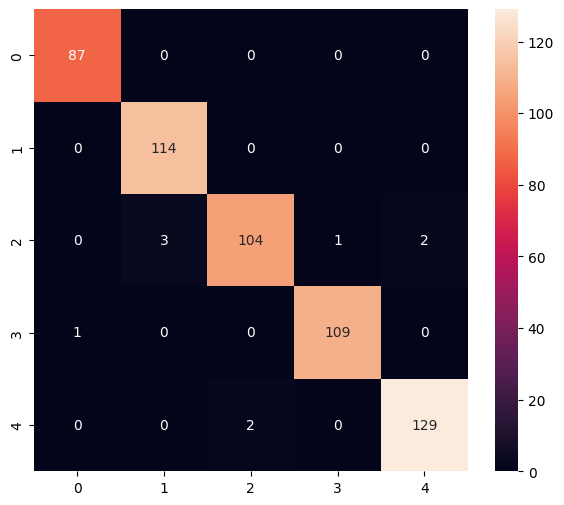

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        87
           1       0.97      1.00      0.99       114
           2       0.98      0.95      0.96       110
           3       0.99      0.99      0.99       110
           4       0.98      0.98      0.98       131

    accuracy                           0.98       552
   macro avg       0.98      0.98      0.98       552
weighted avg       0.98      0.98      0.98       552



In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [198]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)
model.export('/home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModel')
# tensorflowjs_converter --input_format=keras /home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/keypoint_classifier.h5 /home/tingtim/signifai-t/public/models
# tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model /home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModel /home/tingtim/signifai-t/public/models

INFO:tensorflow:Assets written to: /home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModel/assets


INFO:tensorflow:Assets written to: /home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModel/assets


Saved artifact at '/home/tingtim/Code/hand-gesture-recognition-mediapipe/model/keypoint_classifier/savedModel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_10')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  124744293703632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124744293704592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124743507694160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124743507696080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124743507696272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124744293701904: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [199]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp3phtcs_z/assets


INFO:tensorflow:Assets written to: /tmp/tmp3phtcs_z/assets


Saved artifact at '/tmp/tmp3phtcs_z'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_10')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  124744293703632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124744293704592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124743507694160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124743507696080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124743507696272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124744293701904: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1745823236.291777    7551 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1745823236.291789    7551 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-28 14:53:56.291915: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp3phtcs_z
2025-04-28 14:53:56.292304: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-28 14:53:56.292309: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp3phtcs_z
2025-04-28 14:53:56.295471: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-28 14:53:56.313495: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp3phtcs_z
2025-04-28 14:53:56.318802: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 26890 microseconds.


6632

# Inference test

In [200]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/home/tingtim/Code/hand-gesture-recognition-mediapipe/hg-envnew/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [201]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [202]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [203]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 30 μs, sys: 2 μs, total: 32 μs
Wall time: 34.1 μs


In [204]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.2969150e-05 3.2031084e-03 2.3873340e-02 5.6441198e-04 9.7234613e-01]
4
